# Keras Intensive Run

Instructions
1. Define the global variables;
2. Run the second snippet. It builds the network and saves the output to a folder displayed on the console.

In [3]:
# TEST VARIABLES
labelsGroup = [
    ["happy", "sad"],
]
iterationsGroup = [100]
hiddenLayersGroup = [
    [144],
]
batchSize = 128
hyperParametersGroup = [0, 0.01]

In [2]:
# GLOBAL VARIABLES
labelsGroup = [
    # Gonçalo
    ["happy", "neutral"],
    ["angry", "fear", "happy", "neutral", "sad", "surprise"],
    ["fear", "angry"],
    ["happy", "sad"],
    # Margarida
    # ["fear", "sad", "happy"],
    # ["happy", "angry", "neutral"],
    # ["fear", "angry", "surprise"],
    # ["fear", "angry", "surprise", "neutral"],
    
]
iterationsGroup = [1500]
hiddenLayersGroup = [
    [20],
    [144],
    [144, 144],
    [300,200,100,50],
    [300,100,100,100],
]
batchSize = 128
hyperParametersGroup = [0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10]

In [7]:
def confusionMatrix(labels, pred, y):
    
    confusionTFPN = {}
    confusionLabels = {}
    
    # Foreach emotion
    for ie in range(len(labels)):
        # TRUE AND FALSE POSITIVES AND NEGATIVES (TFPN)
        
        # Get indexes where emotion was predicted
        ieIndexesPred = [i for i in range(pred.size) if pred[i]==ie]
        ieIndexesNotPred = [i for i in range(pred.size) if pred[i]!=ie]

        # Predicted, and Actual
        TP = sum(pred[:,np.newaxis][ieIndexesPred]==y[ieIndexesPred])
        # Predicted, but not actual
        FP = sum(pred[:,np.newaxis][ieIndexesPred]!=y[ieIndexesPred])
        # Not predicted, but actual
        FN = sum(y[ieIndexesNotPred]==ie)
        # Not predicted and not actual
        TN = sum(y[ieIndexesNotPred]!=ie)

        TP = TP[0] if TP else 0
        FP = FP[0] if FP else 0
        FN = FN[0] if FN else 0
        TN = TN[0] if TN else 0
        
        confusionTFPN[labels[ie]] = {
            'TP': TP,
            'FP': FP,
            'FN': FN,
            'TN': TN
        }
        
        # CONFUSION WITH OTHER labels (Confusion)
        # For emotion e
        # Count the number of predictions made for all classes
        # Foreach emotion, check how many times it has been predicted 
        
        # Get indexes where emotion is real
        ieIndexesY = [i for i in range(y.size) if y[i]==ie]
        
        # Foreach matching prediction, check what emotion was predicted
        confusionLabels[labels[ie]] = {
            e: sum(pred[:,np.newaxis][ieIndexesY]==labels.index(e))[0] for e in labels
        }
        
    return confusionTFPN, confusionLabels

def outputConfusionTables(labels, testExamplesNumber, confusionTFPN, confusionLabels, axs, axsLine, axsTitle):
     # TABLES
    rows = tuple(labels)
    
    # TABLES / TFPN
    # Output confusion matrix as plot table
    data = [
        [
            f"{vals['TP']} ({vals['TP']/testExamplesNumber*100 if vals['TP'] else 0:.2f}%)",
            f"{vals['TN']} ({vals['TN']/testExamplesNumber*100 if vals['TP'] else 0:.2f}%)",
            f"{vals['TP']+vals['TN']} ({(vals['TP']+vals['TN'])/testExamplesNumber*100 if vals['TP']+vals['TN'] else 0:.2f}%)",
            f"{vals['FP']} ({vals['FP']/testExamplesNumber*100 if vals['FP'] else 0:.2f}%)",
            f"{vals['FN']} ({vals['FN']/testExamplesNumber*100 if vals['FN'] else 0:.2f}%)",
            f"{vals['FP']+vals['FN']} ({(vals['FP']+vals['FN'])/testExamplesNumber*100 if vals['FP']+vals['FN'] else 0:.2f}%)",
            vals['FP']+vals['FN']+vals['TP']+vals['TN']
        ]
        for _, vals in confusionTFPN.items()
    ]
    columns = ['TP (%)', 'TN (%)', 'T (%)', 'FP (%)', 'FN (%)', 'F (%)', f"Total"]
    
    # Colorize cells depending on value
    cellColoursTF=plt.cm.Blues([
        [ (vals['TP']+vals['TN'])/testExamplesNumber, (vals['FP']+vals['FN'])/testExamplesNumber ] for _, vals in confusionTFPN.items()
    ])
    cellColourPos=plt.cm.Greens([
        [ vals['TP']/(vals['TP']+vals['FP']) if vals['TP']+vals['FP'] else 0, vals['FP']/(vals['TP']+vals['FP']) if vals['TP']+vals['FP'] else 0 ] for _, vals in confusionTFPN.items()
    ])
    cellColourNeg=plt.cm.Reds([
        [ vals['TN']/(vals['TN']+vals['FN']) if vals['TN']+vals['FN'] else 0, vals['FN']/(vals['TN']+vals['FN']) if vals['TN']+vals['FN'] else 0 ] for _, vals in confusionTFPN.items()
    ])
    
    cellColours = [
        [
            cellColourPos[i][0],
            cellColourNeg[i][0],
            cellColoursTF[i][0],
            cellColourPos[i][1],
            cellColourNeg[i][1],
            cellColoursTF[i][1],
            [0, 0, 0, 0]
        ]
        for i in range(len(rows))
    ]
        
    the_table = axs[axsLine].table(
      cellText=data,
      rowLabels=rows,
      colLabels=columns,
      loc='center',
      cellColours=cellColours
    )
    # the_table.scale(1.2, 1)
    the_table.auto_set_font_size(False)
    the_table.set_fontsize(20)
    axs[axsLine].axis('off')
    axs[axsLine].axis('tight')
    axs[axsLine].set_title(f"Confusion matrix {axsTitle}", fontsize=20, pad=0)    
    
    # TABLES / Confusion    
    # Output confusion matrix as plot table
    data = [[o for _,o in others.items()] for _,others in confusionLabels.items()]
    columns = rows
    
    # Colorize cells depending on value
    vals = [o for _,others in confusionLabels.items() for _,o in others.items()]
    normal = plt.Normalize(min(vals)-1, max(vals)+1)
    cellColours=plt.cm.Blues(normal(data))
        
    the_table = axs[axsLine+1].table(
      cellText=data,
      rowLabels=rows,
      colLabels=columns,
      loc='center',
      cellColours=cellColours
    )
    
    the_table.set_fontsize(20)
    # the_table.scale(1, 4)
    axs[axsLine+1].axis('off')
    axs[axsLine+1].axis('tight')
    axs[axsLine+1].set_title(f"True/Predicted {axsTitle}", fontsize=20)



LABELS happy, neutral
Loaded 2000 traing examples with 2 labels, each with 48 features (pixels).
Loaded 400 dev examples.
Loaded 400 test examples.

20

Building network for 1500 iterations and batch size of 128 and 1 hidden layers: 20...
Without regularization!

Epoch 1/1500
16/16 [==============================] - 0s 9ms/step - loss: 25070.1522 - accuracy: 0.4899 - val_loss: 0.6936 - val_accuracy: 0.5000
Epoch 2/1500
16/16 [==============================] - 0s 4ms/step - loss: 0.6905 - accuracy: 0.4949 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/1500
16/16 [==============================] - 0s 4ms/step - loss: 0.6928 - accuracy: 0.5065 - val_loss: 0.6937 - val_accuracy: 0.5000
Epoch 4/1500
16/16 [==============================] - 0s 3ms/step - loss: 0.6923 - accuracy: 0.4947 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/1500
16/16 [==============================] - 0s 4ms/step - loss: 0.6922 - accuracy: 0.4972 - val_loss: 0.6929 - val_accuracy: 0.5000
Epoch 6/1500
16/16 [

16/16 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5039 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 57/1500
16/16 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.4969 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 58/1500
16/16 [==============================] - 0s 4ms/step - loss: 0.6932 - accuracy: 0.5048 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 59/1500
16/16 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.4966 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 60/1500
16/16 [==============================] - 0s 4ms/step - loss: 0.6932 - accuracy: 0.4945 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 61/1500
16/16 [==============================] - 0s 4ms/step - loss: 0.6932 - accuracy: 0.4917 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 62/1500
16/16 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5006 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 63/1500

16/16 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.4857 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 114/1500
16/16 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.4907 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 115/1500
16/16 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.4812 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 116/1500
16/16 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5161 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 117/1500
16/16 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.4925 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 118/1500
16/16 [==============================] - 0s 4ms/step - loss: 0.6932 - accuracy: 0.4892 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 119/1500
16/16 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5012 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 1

Epoch 170/1500
16/16 [==============================] - 0s 4ms/step - loss: 0.6932 - accuracy: 0.4813 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 171/1500
16/16 [==============================] - 0s 4ms/step - loss: 0.6932 - accuracy: 0.4753 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 172/1500
16/16 [==============================] - 0s 4ms/step - loss: 0.6932 - accuracy: 0.4855 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 173/1500
16/16 [==============================] - 0s 4ms/step - loss: 0.6932 - accuracy: 0.4970 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 174/1500
16/16 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.5090 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 175/1500
16/16 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.4970 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 176/1500
16/16 [==============================] - 0s 4ms/step - loss: 0.6932 - accuracy: 0.4935 - val_loss: 0.6931 - val_accuracy:

Epoch 227/1500
16/16 [==============================] - 0s 4ms/step - loss: 0.6932 - accuracy: 0.4688 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 228/1500
16/16 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5117 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 229/1500
16/16 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.4902 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 230/1500
16/16 [==============================] - 0s 4ms/step - loss: 0.6932 - accuracy: 0.4807 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 231/1500
16/16 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5069 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 232/1500
16/16 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5163 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 233/1500
16/16 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.4858 - val_loss: 0.6931 - val_accuracy:

Epoch 284/1500
16/16 [==============================] - 0s 6ms/step - loss: 0.6932 - accuracy: 0.5036 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 285/1500
16/16 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.4618 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 286/1500
16/16 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5144 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 287/1500
16/16 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.4909 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 288/1500
16/16 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.5017 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 289/1500
16/16 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.4825 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 290/1500
16/16 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.4887 - val_loss: 0.6931 - val_accuracy:

Epoch 341/1500
16/16 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5096 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 342/1500
16/16 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.5034 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 343/1500
16/16 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.5035 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 344/1500
16/16 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5085 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 345/1500
16/16 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5023 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 346/1500
16/16 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5107 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 347/1500
16/16 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.4852 - val_loss: 0.6931 - val_accuracy:

Epoch 398/1500
16/16 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5173 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 399/1500
16/16 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.4769 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 400/1500
16/16 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5064 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 401/1500
16/16 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.4799 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 402/1500
16/16 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.4860 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 403/1500
16/16 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5023 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 404/1500
16/16 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5047 - val_loss: 0.6931 - val_accuracy:

Epoch 455/1500
16/16 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.5101 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 456/1500
16/16 [==============================] - 0s 6ms/step - loss: 0.6932 - accuracy: 0.5003 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 457/1500
16/16 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5224 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 458/1500
16/16 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.4958 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 459/1500
16/16 [==============================] - 0s 6ms/step - loss: 0.6932 - accuracy: 0.5034 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 460/1500
16/16 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.5005 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 461/1500
16/16 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.5002 - val_loss: 0.6931 - val_accuracy:

Epoch 512/1500
16/16 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.4760 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 513/1500
16/16 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.4971 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 514/1500
16/16 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.4974 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 515/1500
16/16 [==============================] - 0s 6ms/step - loss: 0.6932 - accuracy: 0.4933 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 516/1500
16/16 [==============================] - 0s 6ms/step - loss: 0.6932 - accuracy: 0.5027 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 517/1500
16/16 [==============================] - 0s 6ms/step - loss: 0.6932 - accuracy: 0.5016 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 518/1500
16/16 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.5042 - val_loss: 0.6931 - val_accuracy:

Epoch 569/1500
16/16 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.4681 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 570/1500
16/16 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.4658 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 571/1500
16/16 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5049 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 572/1500
16/16 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.4587 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 573/1500
16/16 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.4753 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 574/1500
16/16 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.4834 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 575/1500
16/16 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.4885 - val_loss: 0.6931 - val_accuracy:

Epoch 626/1500
16/16 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.5013 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 627/1500
16/16 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.4927 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 628/1500
16/16 [==============================] - 0s 6ms/step - loss: 0.6932 - accuracy: 0.4939 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 629/1500
16/16 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.4857 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 630/1500
16/16 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.4952 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 631/1500
16/16 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.4911 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 632/1500
16/16 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.4953 - val_loss: 0.6931 - val_accuracy:

Epoch 683/1500
16/16 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.4852 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 684/1500
16/16 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.5001 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 685/1500
16/16 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.4989 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 686/1500
16/16 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.4949 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 687/1500
16/16 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.4943 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 688/1500
16/16 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.5004 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 689/1500
16/16 [==============================] - 0s 6ms/step - loss: 0.6932 - accuracy: 0.4805 - val_loss: 0.6931 - val_accuracy:

Epoch 740/1500
16/16 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.4994 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 741/1500
16/16 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.4951 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 742/1500
16/16 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.4834 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 743/1500
16/16 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.5118 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 744/1500
16/16 [==============================] - 0s 6ms/step - loss: 0.6932 - accuracy: 0.4732 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 745/1500
16/16 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5090 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 746/1500
16/16 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.4840 - val_loss: 0.6931 - val_accuracy:

Epoch 797/1500
16/16 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.4956 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 798/1500
16/16 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5037 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 799/1500
16/16 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.4769 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 800/1500
16/16 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.5011 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 801/1500
16/16 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5282 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 802/1500
16/16 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.4921 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 803/1500
16/16 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.4803 - val_loss: 0.6931 - val_accuracy:

Epoch 854/1500
16/16 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5022 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 855/1500
16/16 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.4972 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 856/1500
16/16 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5114 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 857/1500
16/16 [==============================] - 0s 6ms/step - loss: 0.6932 - accuracy: 0.5028 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 858/1500
16/16 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.4744 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 859/1500
16/16 [==============================] - 0s 6ms/step - loss: 0.6932 - accuracy: 0.4816 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 860/1500
16/16 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.4944 - val_loss: 0.6931 - val_accuracy:

Epoch 911/1500
16/16 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5111 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 912/1500
16/16 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.4823 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 913/1500
16/16 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.5019 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 914/1500
16/16 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.4834 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 915/1500
16/16 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.5072 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 916/1500
16/16 [==============================] - 0s 6ms/step - loss: 0.6932 - accuracy: 0.4808 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 917/1500
16/16 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5159 - val_loss: 0.6931 - val_accuracy:

Epoch 968/1500
16/16 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.4701 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 969/1500
16/16 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.4897 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 970/1500
16/16 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5077 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 971/1500
16/16 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.4694 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 972/1500
16/16 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.4728 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 973/1500
16/16 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5113 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 974/1500
16/16 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.4864 - val_loss: 0.6931 - val_accuracy:

Epoch 1025/1500
16/16 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.5018 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 1026/1500
16/16 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.4938 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 1027/1500
16/16 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.5014 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 1028/1500
16/16 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.4729 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 1029/1500
16/16 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.4926 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 1030/1500
16/16 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.4556 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 1031/1500
16/16 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.4965 - val_loss: 0.6931 - val_ac

16/16 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.5038 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 1082/1500
16/16 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.4604 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 1083/1500
16/16 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.5003 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 1084/1500
16/16 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.4794 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 1085/1500
16/16 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.4871 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 1086/1500
16/16 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.5112 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 1087/1500
16/16 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.4906 - val_loss: 0.6931 - val_accuracy: 0.5000
E

16/16 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.4983 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 1138/1500
16/16 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5175 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 1139/1500
16/16 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5017 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 1140/1500
16/16 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.4904 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 1141/1500
16/16 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.4724 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 1142/1500
16/16 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.4708 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 1143/1500
16/16 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.4746 - val_loss: 0.6931 - val_accuracy: 0.5000
E

16/16 [==============================] - 0s 4ms/step - loss: 0.6932 - accuracy: 0.4925 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 1194/1500
16/16 [==============================] - 0s 4ms/step - loss: 0.6932 - accuracy: 0.4987 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 1195/1500
16/16 [==============================] - 0s 4ms/step - loss: 0.6932 - accuracy: 0.5008 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 1196/1500
16/16 [==============================] - 0s 4ms/step - loss: 0.6932 - accuracy: 0.4867 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 1197/1500
16/16 [==============================] - 0s 4ms/step - loss: 0.6932 - accuracy: 0.4961 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 1198/1500
16/16 [==============================] - 0s 4ms/step - loss: 0.6932 - accuracy: 0.4992 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 1199/1500
16/16 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.4812 - val_loss: 0.6931 - val_accuracy: 0.5000
E

16/16 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5056 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 1250/1500
16/16 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.4687 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 1251/1500
16/16 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5124 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 1252/1500
16/16 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.5135 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 1253/1500
16/16 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.4687 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 1254/1500
16/16 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.4885 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 1255/1500
16/16 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.4982 - val_loss: 0.6931 - val_accuracy: 0.5000
E

16/16 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.5039 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 1306/1500
16/16 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.4821 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 1307/1500
16/16 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.4996 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 1308/1500
16/16 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5131 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 1309/1500
16/16 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.4821 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 1310/1500
16/16 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.4894 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 1311/1500
16/16 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.4879 - val_loss: 0.6931 - val_accuracy: 0.5000
E

16/16 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.5012 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 1362/1500
16/16 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.4938 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 1363/1500
16/16 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.5005 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 1364/1500
16/16 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5044 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 1365/1500
16/16 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.5055 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 1366/1500
16/16 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5129 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 1367/1500
16/16 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.4889 - val_loss: 0.6931 - val_accuracy: 0.5000
E

16/16 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.4896 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 1418/1500
16/16 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.4906 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 1419/1500
16/16 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.4927 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 1420/1500
16/16 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.5017 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 1421/1500
16/16 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.4953 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 1422/1500
16/16 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.4680 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 1423/1500
16/16 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.4952 - val_loss: 0.6931 - val_accuracy: 0.5000
E

16/16 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.4968 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 1474/1500
16/16 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.4831 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 1475/1500
16/16 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.4835 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 1476/1500
16/16 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.4754 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 1477/1500
16/16 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.4936 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 1478/1500
16/16 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5127 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 1479/1500
16/16 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5132 - val_loss: 0.6931 - val_accuracy: 0.5000
E

Epoch 28/1500
16/16 [==============================] - 0s 6ms/step - loss: 0.6932 - accuracy: 0.4880 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 29/1500
16/16 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.4818 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 30/1500
16/16 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.4951 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 31/1500
16/16 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.4876 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 32/1500
16/16 [==============================] - 0s 6ms/step - loss: 0.6932 - accuracy: 0.5082 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 33/1500
16/16 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5141 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 34/1500
16/16 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.4953 - val_loss: 0.6931 - val_accuracy: 0.5000

16/16 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.4977 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 86/1500
16/16 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.4815 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 87/1500
16/16 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.4699 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 88/1500
16/16 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5134 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 89/1500
16/16 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.4980 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 90/1500
16/16 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5110 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 91/1500
16/16 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5100 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 92/1500

16/16 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.4899 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 143/1500
16/16 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.5098 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 144/1500
16/16 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.4975 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 145/1500
16/16 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.5047 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 146/1500
16/16 [==============================] - 0s 7ms/step - loss: 0.6932 - accuracy: 0.4676 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 147/1500
16/16 [==============================] - 0s 6ms/step - loss: 0.6932 - accuracy: 0.4748 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 148/1500
16/16 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.5052 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 1

Epoch 199/1500
16/16 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.5009 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 200/1500
16/16 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.5039 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 201/1500
16/16 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.4978 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 202/1500
16/16 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5052 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 203/1500
16/16 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.4643 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 204/1500
16/16 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.4891 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 205/1500
16/16 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5111 - val_loss: 0.6931 - val_accuracy:

Epoch 256/1500
16/16 [==============================] - 0s 6ms/step - loss: 0.6932 - accuracy: 0.4788 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 257/1500
16/16 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.4805 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 258/1500
16/16 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.4891 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 259/1500
16/16 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.4976 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 260/1500
16/16 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5188 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 261/1500
16/16 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.4967 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 262/1500
16/16 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5159 - val_loss: 0.6931 - val_accuracy:

KeyboardInterrupt: 

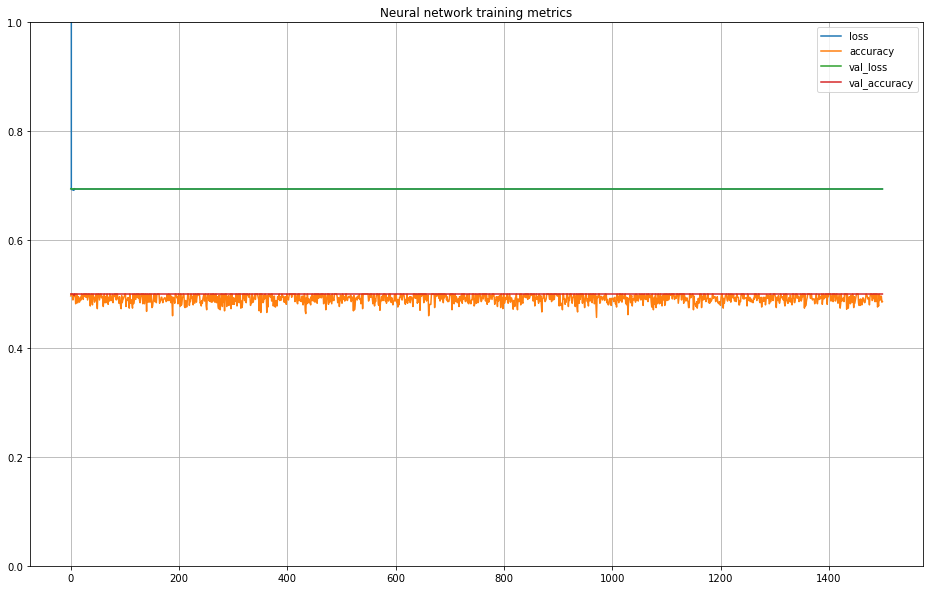

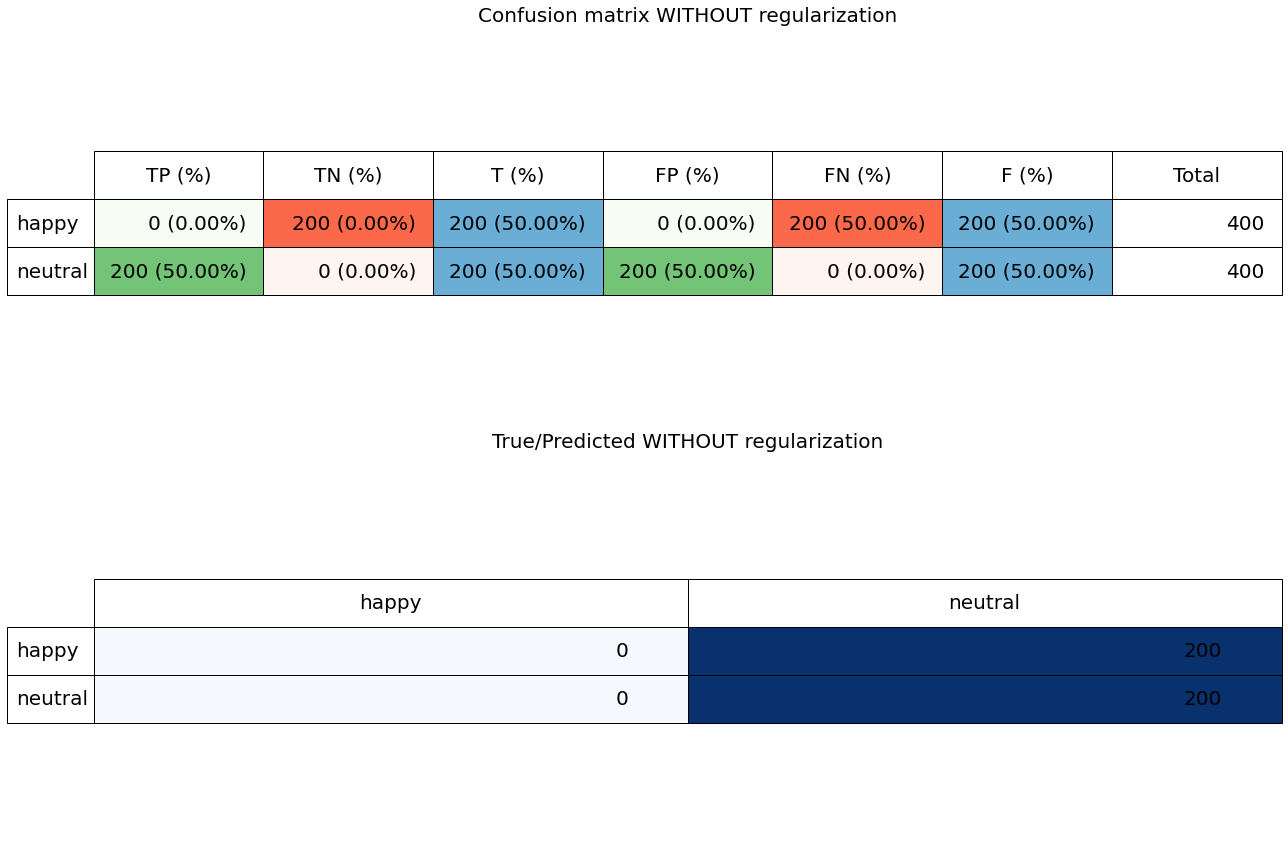

In [8]:
#### IMPORT LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#to load matlab mat files
from scipy.io import loadmat
# for saving metrics
import os 
import json
# for neural network
import tensorflow as tf
from tensorflow import keras

if not os.path.exists('./metrics'):
    os.makedirs('./metrics')

# FOR EACH LABEL GROUP
for labelNames in labelsGroup:
    # LOAD FILES
    print("\n\nLABELS", ', '.join(labelNames))

    # Load Training/Dev/Test data
    mat=loadmat(f"../datasets/train/{'_'.join(labelNames)}.mat")
    X, y = mat["X"], mat["y"]
    matDev=loadmat(f"../datasets/dev/{'_'.join(labelNames)}.mat")
    X_valid, y_valid = matDev["X"], matDev["y"]
    matTest=loadmat(f"../datasets/test/{'_'.join(labelNames)}.mat")
    X_test, y_test = matTest["X"], matTest["y"]
    
    # NUMBERS
    m = X.shape[0] # number of training examples
    labels = np.max(y)+1 # number of labels
    features = X.shape[1] # number of features per example

    # Output user feedback
    print(f"Loaded {m} traing examples with {labels} labels, each with {features} features (pixels).")
    print(f"Loaded {X_valid.shape[0]} dev examples.")
    print(f"Loaded {X_test.shape[0]} test examples.")
    
    print()
    
    # Create folder for metrics
    labelFolder = f"./metrics/{'_'.join(labelNames)}"
    if not os.path.exists(labelFolder):
        os.makedirs(labelFolder)
    if not os.path.exists(f"{labelFolder}/history"):
        os.makedirs(f"{labelFolder}/history")
    if not os.path.exists(f"{labelFolder}/predict"):
        os.makedirs(f"{labelFolder}/predict")
    if not os.path.exists(f"{labelFolder}/archive"):
        os.makedirs(f"{labelFolder}/archive")
    
    # FOREACH HIDDEN LAYER
    for hiddenLayers in hiddenLayersGroup:
        # FOR EACH HYPER PARAMETER
        for hyperParameter in hyperParametersGroup:
            # FOR EACH ITERATION NUMBER
            for iterations in iterationsGroup:
                
                hiddenLayersText = '_'.join(map(str, hiddenLayers)) if len(hiddenLayers)>1 else hiddenLayers[0]
                print(hiddenLayersText)
                combinationName = f"{iterations}iter_{batchSize}batchS_{hyperParameter}hyper_{len(hiddenLayers)}hlayers__{hiddenLayersText}"
                folder = f"{labelFolder}/archive/{combinationName}/"
                if not os.path.exists(folder):
                    os.makedirs(folder)

                print(f"\nBuilding network for {iterations} iterations and batch size of {batchSize} and {len(hiddenLayers)} hidden layers: {hiddenLayersText}...")
                print("With regularization!" if hyperParameter else "Without regularization!")
                print()

                # BUILD NETWORK
                # Create model
                modelSeq = []
                # Flattens each image (48x48) to 1x2304
                modelSeq.append(keras.layers.Flatten(input_shape = [2304]))
                # Hidden layers with relu activation function
                for h in hiddenLayers:                        
                    modelSeq.append(keras.layers.Dense(
                        h, 
                        activation = "relu", 
                        bias_regularizer= keras.regularizers.l2(hyperParameter) if hyperParameter else None
                    ))
                # Output layer with softmax activation function
                modelSeq.append(keras.layers.Dense(
                    labels, 
                    activation = "softmax",
                    bias_regularizer= keras.regularizers.l2(hyperParameter) if hyperParameter else None
                ))

                model = keras.models.Sequential(modelSeq)

                # Compile model
                model.compile(
                    # Using sparse categorical crossentropy loss function
                    loss = "sparse_categorical_crossentropy",
                    # Using stochastic gradient descent as gradient descent
                    optimizer = "sgd",
                    # In addition to cost, we want accuracy to help understanding how the model is working 
                    metrics = ["accuracy"]
                )

                # Train the network
                history = model.fit(
                    X,
                    y,
                    epochs = iterations,
                    batch_size = batchSize,
                    validation_data = (X_valid, y_valid)
                )

                # METRICS (SAVE TO FILE)

                # Model training history
                with open(f"{folder}/history.json", "w") as f:
                    json.dump(history.history, f)

                # Test model evaluation
                with open(f"{folder}/evaluation.json", "w") as f:
                    json.dump(model.evaluate(X_test, y_test, return_dict=True), f)

                # Prediction for test data
                with open(f"{folder}/predict.json", "w") as f:
                    json.dump(model.predict(X_test).tolist(), f)

                print(f"\nModel trained and metrics saved to {folder}!")

                # GENERATE GRAPHS AND SAVE TO FILE

                # Model training history
                pd.DataFrame(history.history).plot(figsize = (16, 10))
                plt.grid(True)
                plt.gca().set_ylim(0, 1)
                plt.title("Neural network training metrics")
                plt.savefig(f"{labelFolder}/history/{combinationName}.png")

                # Prediction for test data
                predict = model.predict(X_test)
                y_pred = np.array([np.argmax(p) for p in predict])
                confusionTFPN, confusionLabels = confusionMatrix(labelNames, y_pred, y_test)
                fig, axs = plt.subplots(2,1)
                outputConfusionTables(labelNames, y_test.size, confusionTFPN, confusionLabels, axs, 0, "WITHOUT regularization")
                fig.set_size_inches(18,6*len(labelNames))
                fig.subplots_adjust(left=0.2, top=20)
                fig.tight_layout()
                fig.savefig(f"{labelFolder}/predict/{combinationName}.png")